In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/sandp500"


all_stocks_5yr.csv  getSandP.py  individual_stocks_5yr.zip  merge.sh


In [0]:
#data path
path = "/content/drive/My Drive/sandp500/"

In [0]:
data = pd.read_csv(path + 'all_stocks_5yr.csv')

In [0]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [0]:
data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [0]:
data.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [0]:
df = data.loc[data['Name'] == 'AAL']

In [0]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL
1258,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL


In [0]:
open_pr = df.rename(columns={'date': 'ds',
                        'open': 'y'})

In [0]:
open_pr.head()

,ds,y,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [0]:
train, test = open_pr[:1000] , open_pr[1000:]

In [0]:
train.tail()

,ds,y,high,low,close,volume,Name
995,2017-01-23,47.90,48.09,46.75,46.94,4284196,AAL
996,2017-01-24,47.05,47.80,46.80,47.54,4926677,AAL
997,2017-01-25,47.90,48.21,47.61,47.91,5139002,AAL
998,2017-01-26,48.43,49.71,48.33,49.59,10332849,AAL
999,2017-01-27,50.00,50.00,46.72,46.95,19411050,AAL


In [0]:
!pip install pystan

In [0]:
!pip install fbprophet

In [0]:
from fbprophet import Prophet

In [0]:
my_model = Prophet(interval_width=0.95)

In [0]:
my_model.fit(train)
future_dates = my_model.make_future_dataframe(periods=200)
future_dates.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1195,2017-08-11
1196,2017-08-12
1197,2017-08-13
1198,2017-08-14
1199,2017-08-15


In [0]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1195,2017-08-11,51.009835,42.174095,60.273181
1196,2017-08-12,53.794755,44.294346,63.216204
1197,2017-08-13,53.753141,44.700068,63.026796
1198,2017-08-14,50.862054,41.399976,60.536408
1199,2017-08-15,50.811444,41.281926,60.604728


In [0]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-02-08,12.995733,8.362944,17.388254
1,2013-02-11,13.223595,8.881185,17.673580
2,2013-02-12,13.289245,8.773876,17.677788
3,2013-02-13,13.451586,8.708240,17.976638
4,2013-02-14,13.465557,8.892081,17.953911


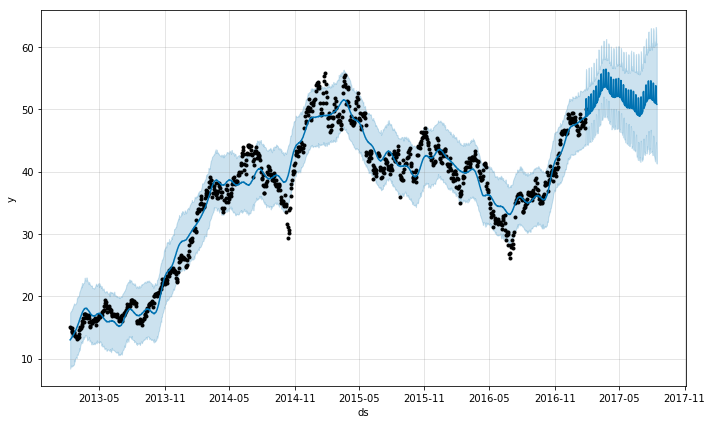

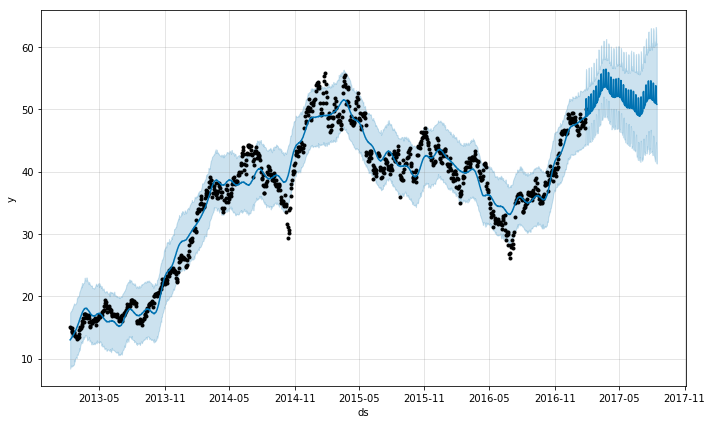

In [0]:
my_model.plot(forecast,
              uncertainty=True)

In [0]:
print('RMSE:', np.sqrt(np.mean((forecast.loc[:1200, 'yhat']- open_pr['y'])**2))/ np.mean(open_pr['y']))

RMSE: 0.08610283223402884


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 0.0819754024433498


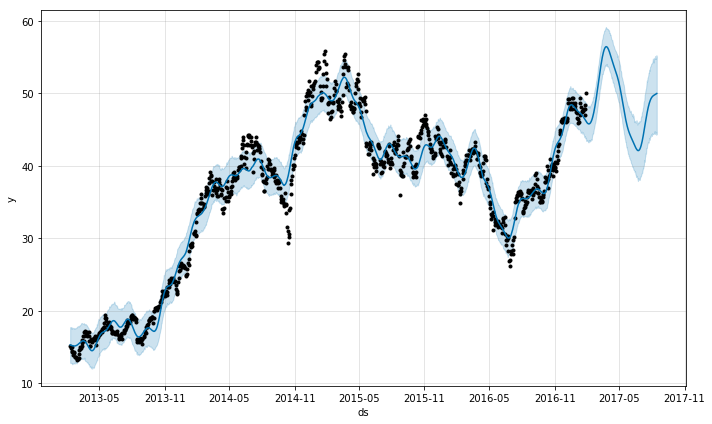

In [0]:
my_model = Prophet(weekly_seasonality=False).add_seasonality(name='monthly', period=365 ,fourier_order=5)
my_model.fit(train)
future_dates = my_model.make_future_dataframe(periods=200)
forecast = my_model.predict(future_dates)
my_model.plot(forecast,
              uncertainty=True)
print('RMSE:', np.sqrt(np.mean((forecast.loc[:1200, 'yhat']- open_pr['y'])**2))/ np.mean(open_pr['y']))

In [0]:
seasonality = [1,2,3,4,5,6,7,30, 30.5,60,71,90,91.5,93.5,100,120,122,182.5,365, 730]


In [0]:
import time

start = time.time()

min_RMSE = 100
best_seasonality = 0

for i in seasonality :
  my_model = Prophet(weekly_seasonality=False).add_seasonality(name='monthly', period=i ,fourier_order=5)
  my_model.fit(train)
  future_dates = my_model.make_future_dataframe(periods=200)
  forecast = my_model.predict(future_dates)
  rmse = np.sqrt(np.mean((forecast.loc[:1200, 'yhat']- open_pr['y'])**2))/ np.mean(open_pr['y'])
  if (min_RMSE > rmse):
    min_RMSE = rmse
    seasonality = i
print('RMSE:', min_RMSE)
print(best_seasonality)

end = time.time()
print(end - start)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

RMSE: 0.07890072176582023
0
115.05913257598877


182.5